<a href="https://colab.research.google.com/github/konrad-daniel-sanchez/revision-literatura-Scopus/blob/master/Revisi%C3%B3n_de_literatura_Scopus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisión de literatura de Scopus

Para llevar a cabo la revisión se hará uso de la librería litstudy (https://pypi.org/project/litstudy/) de python, así como las librerías numpy, pandas y matplotlib.

En este ejercicio realizaremos una revisión de los datos con estadística exploratoria y descriptiva, así como la aplicación de algunas técnicas de NLP (Procesamiento de Lenguaje Natural).

Para los datos iniciales se hizo uso de las palabras claves "GPU" y "programming model".


## Paso 1: Instalar las librerías necesarias

In [ ]:
!pip install litstudy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.5 MB/s eta 0:00:00
  Created wheel for litstudy: filename=litstudy-1.0.6-py3-none-any.whl size=50021 sha256=bb0428408809fa3b80e637cfa664d95ec882e0ea1026985b153584c54d118665
  Stored in directory: /root/.cache/pip/wheels/72/97/1c/6327ac

## Paso 2: Importar las librerías necesarias y realizar las configuraciones pertinentes

In [ ]:
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

## Paso 3: Recolectar los datos de la búsqueda

In [ ]:
docs_scopus = litstudy.load_scopus_csv('data/scopus.csv')

In [ ]:
print(len(docs_scopus), 'documentos encontrados')

1539 documentos encontrados


## Paso 4: Filtramos los datos dependiendo del caso

Graficamos los documentos por años de publicación

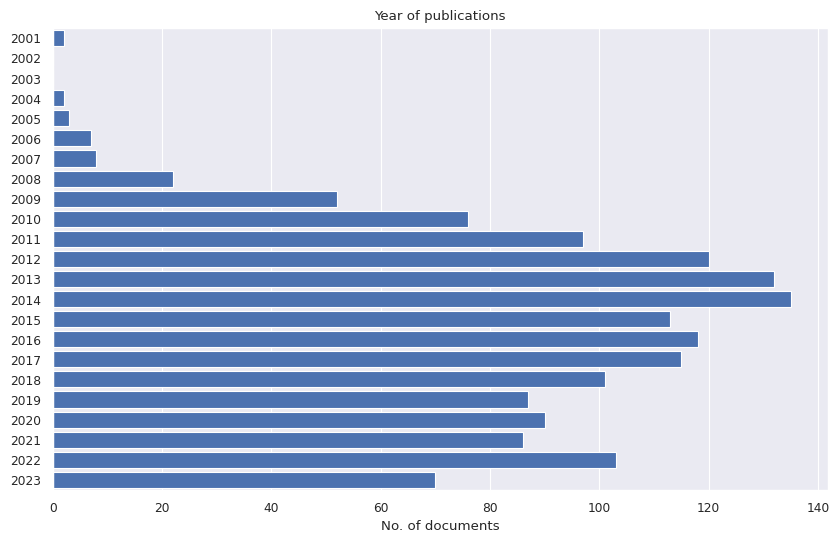

In [ ]:
litstudy.plot_year_histogram(docs_scopus);

En este ejemplo nos damos cuenta que hay una publicación del 2001, sin embargo las GPUs se han usado para propósito general en computación desde el 2006. Así que filtramos las publicaciones por año de publicación

In [ ]:
docs = docs_scopus.filter_docs(lambda d: d.publication_year >= 2006)
print(len(docs), 'documentos filtrados desde el 2006')

1532 documentos filtrados desde el 2006


### Estadísticas generales:

Para poder llevar a cabo esta revisión, podemos graficar distintos datos, a continuación se presentan algunos ejemplos que puede utilizar:

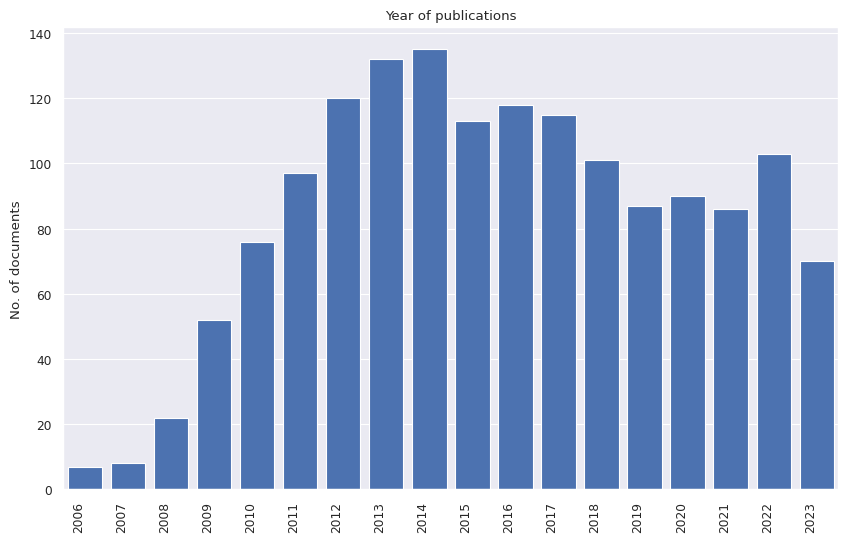

In [ ]:
litstudy.plot_year_histogram(docs, vertical=True);

Graficamos la afiliación de los autores (La entidad a la cuál se encuentran afiliados al momento de realizar la investigación, normalmente corresponde a la universidad o entidad).

En la siguiente gráfica se presentan las 15 afiliaciones con la mayor cantidad de publicaciones.

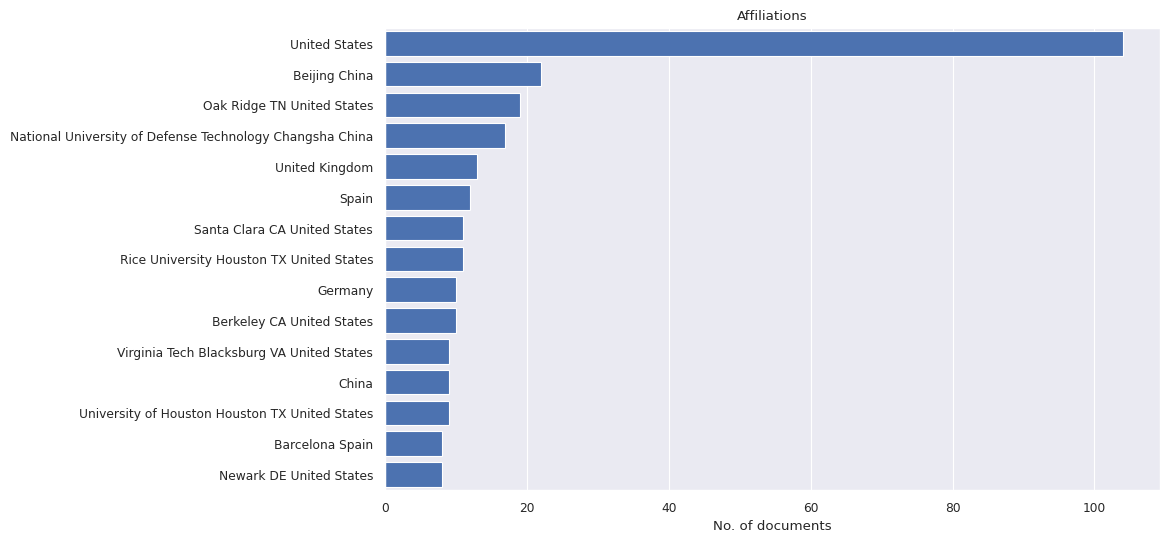

In [ ]:
litstudy.plot_affiliation_histogram(docs, limit=15);

En la siguiente gráfica se presentan los autores que más han realizado publicaciones al respecto

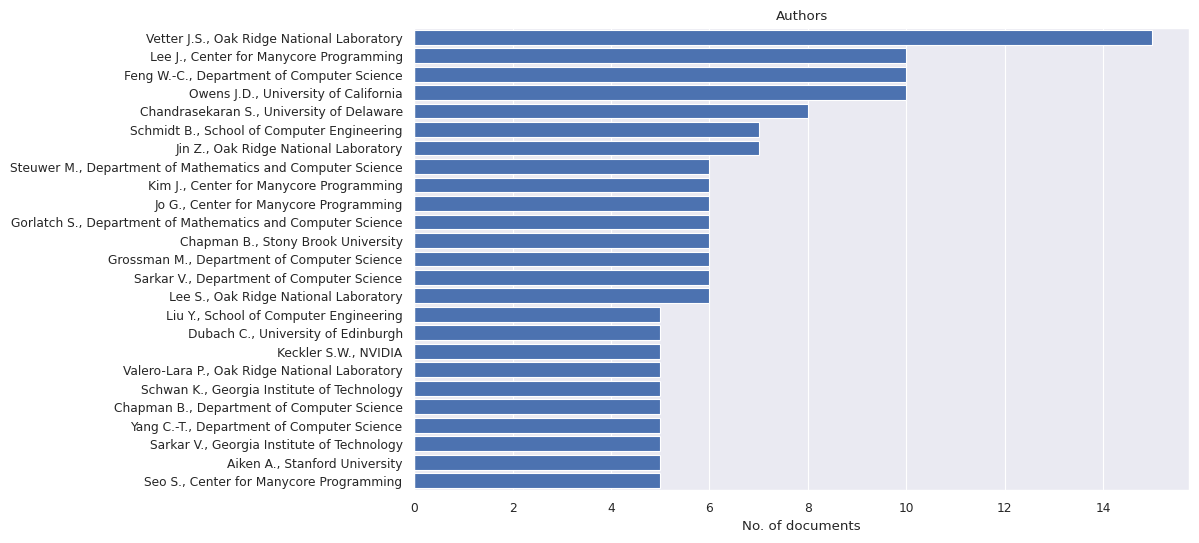

In [ ]:
litstudy.plot_author_histogram(docs);


Los idiomas en los cuales más realizan publicaciones

/usr/local/lib/python3.10/dist-packages/litstudy/stats.py:44: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  totals = pd.Series(totals)


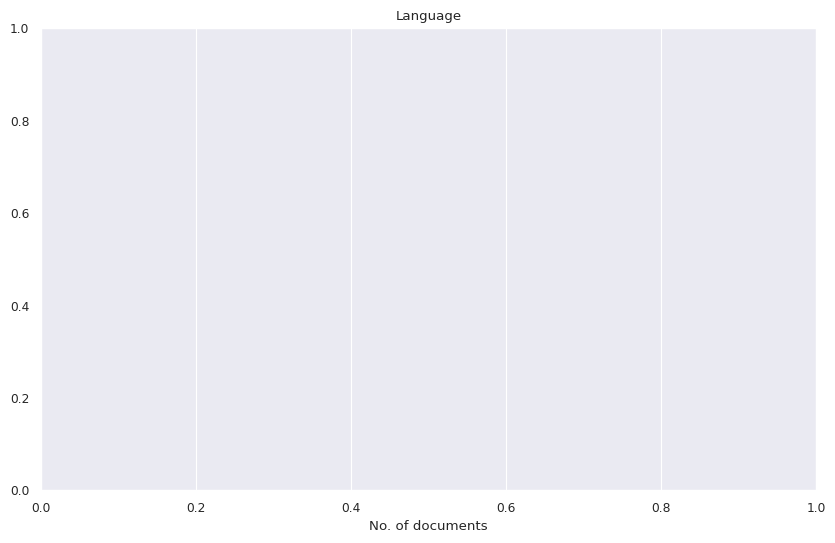

In [ ]:
litstudy.plot_language_histogram(docs);


Se grafica el congreso o la revista donde se realizó la publicación

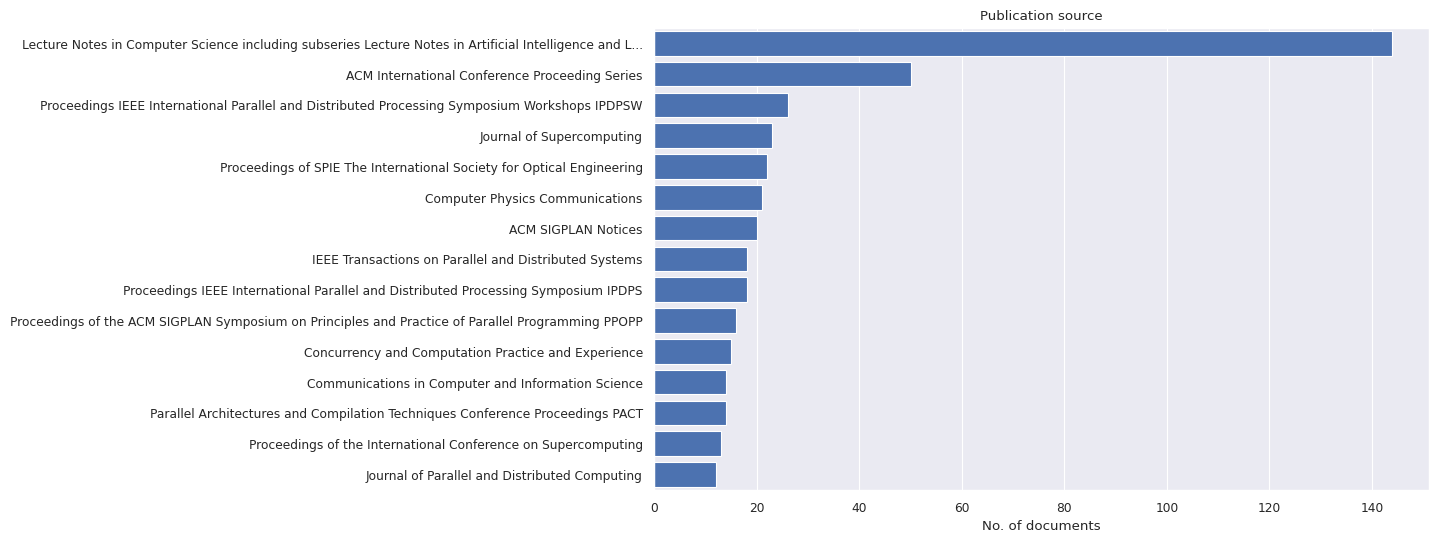

In [ ]:
litstudy.plot_source_histogram(docs, limit=15);

El país de origen de la publicación

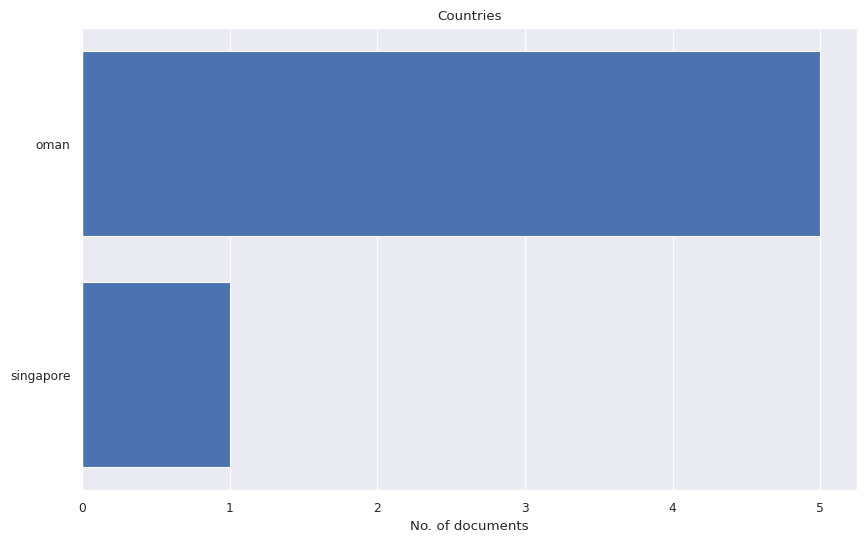

In [ ]:
litstudy.plot_country_histogram(docs, limit=15);

Continente de origen de la publicación

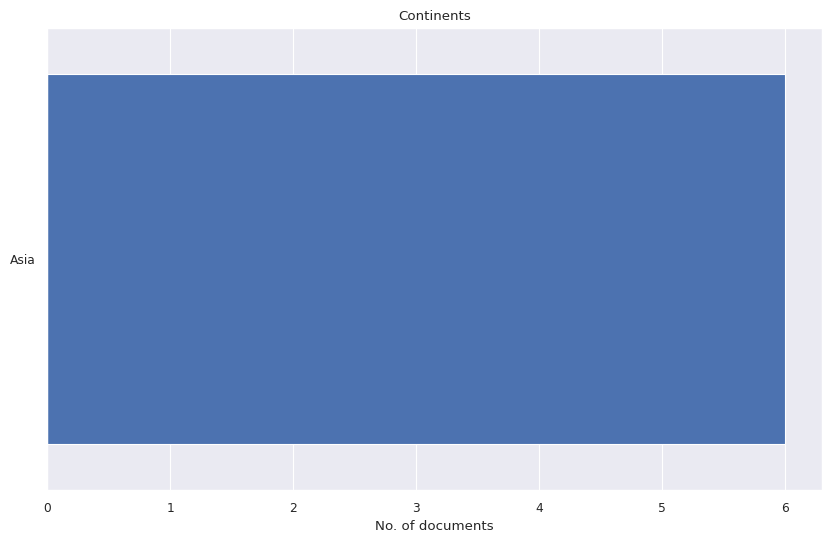

In [ ]:
litstudy.plot_continent_histogram(docs);

## Paso 5: Análisis de red

La red que se muestra a continuación es un ejemplo de una red de co-citación. Este es un tipo de red en la que los nodos representan documentos y las aristas representan pares de documentos que han sido citados simultáneamente por otros trabajos. La fuerza de las aristas indica con qué frecuencia dos documentos han sido citados juntos.

In [ ]:
litstudy.plot_cocitation_network(docs, max_edges=500)

no edges given


Debido a los datos de este ejemplo, no se puede mostrar la red de co-citaciones, sin embargo se puede ver un ejemplo en la documentación, en el siguiente link: https://nlesc.github.io/litstudy/example.html#Network-analysis

## Paso 6: Modelamiento de temas

Creamos el Corpus (Conjunto de textos o datos para realizar la revisión).

In [ ]:
corpus = litstudy.build_corpus(docs, ngram_threshold=0.8)

Presentamos la distribución de los temas

In [ ]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
artificial_intelligence,10
authors_ios,13
berlin_heidelberg,31
branch_divergence,10
broadband_engine,5
...,...
taylor_francis,9
trade_offs,12
trans_tech,7
unified_device,181


Visualizamos la distribución:

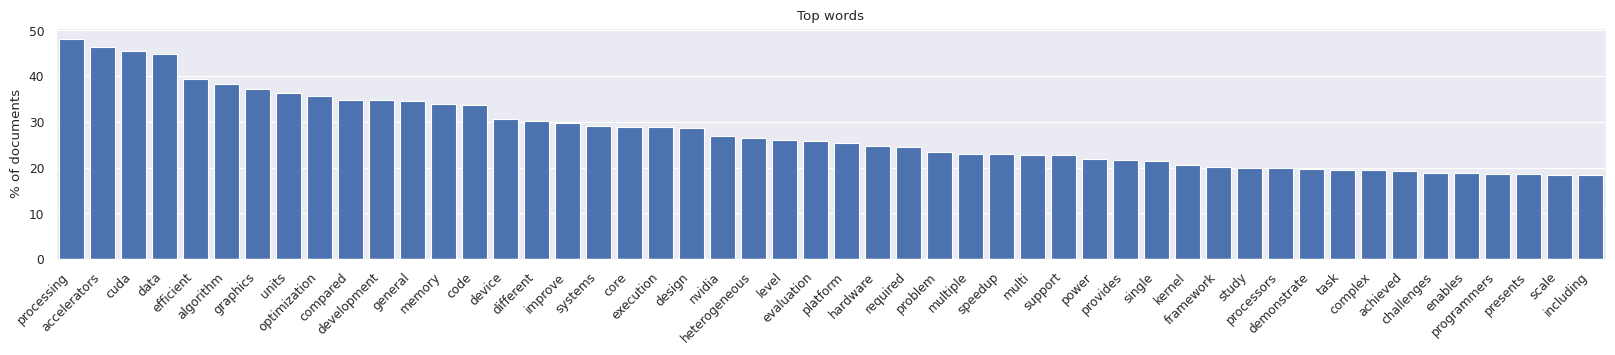

In [ ]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);

A continuación, entrenamos un modelo de temas NMF. El modelado de temas es una técnica de procesamiento de lenguaje natural para descubrir "temas" abstractos en un conjunto de documentos. Necesitamos seleccionar manualmente el número de temas deseados. Aquí elegimos 15 temas. Se recomienda experimentar con más o menos temas para obtener temas más detallados o más generales.

In [ ]:
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

Para entender el resultado de la factorización de matrices no negativas (NMF), podemos imprimir las palabras principales para cada tema.

In [ ]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['simulation', 'particle', 'quantum', 'fdtd', 'carlo']
Topic 2: ['openmp', 'compiler', 'offloading', 'proceedings', 'llvm']
Topic 3: ['network', 'neural', 'learning', 'training', 'deep']
Topic 4: ['cluster', 'mpi', 'node', 'hybrid', 'communication']
Topic 5: ['image', 'algorithm', 'processing', 'reconstruction', 'speed']
Topic 6: ['kernel', 'memory', 'data', 'transfer', 'warp']
Topic 7: ['task', 'heterogeneous', 'scheduling', 'mapreduce', 'systems']
Topic 8: ['solver', 'matrix', 'sparse', 'linear', 'element']
Topic 9: ['sycl', 'portability', 'oneapi', 'intel', 'migration']
Topic 10: ['code', 'level', 'compiler', 'language', 'portability']
Topic 11: ['graph', 'analytics', 'gunrock', 'primitives', 'vertex']
Topic 12: ['opencl', 'host', 'heterogeneous', 'dopencl', 'api']
Topic 13: ['fpga', 'synthesis', 'energy', 'flow', 'reconfigurable']
Topic 14: ['openacc', 'directive', 'porting', 'openmp', 'code']
Topic 15: ['gpgpu', 'memory', 'general_purpose', 'cache', 'purpose']


Una forma alternativa de visualizar la salida de NMF es representar cada tema descubierto como una nube de palabras. El tamaño de cada palabra en la nube indica la importancia de esa palabra para ese tema.

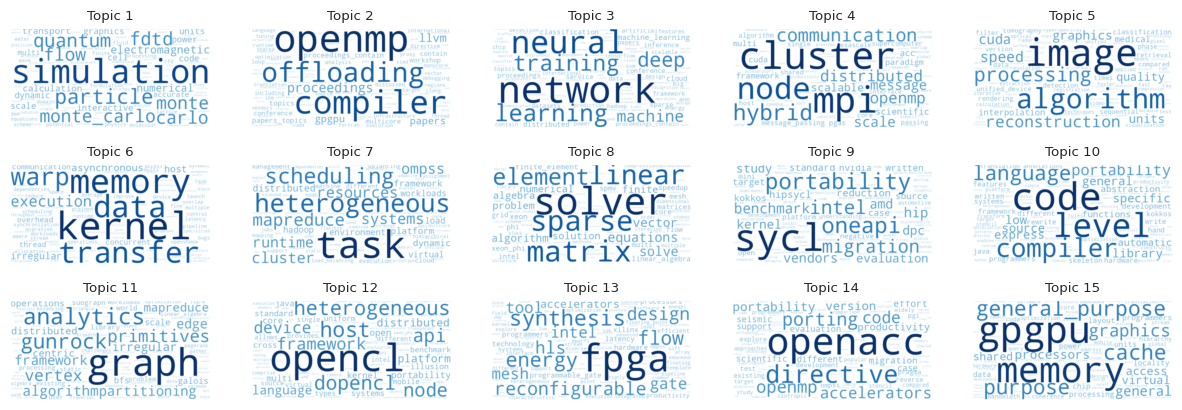

In [ ]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

Estos 15 temas parecen prometedores. Por ejemplo, hay un tema sobre gráficos, uno sobre OpenACC (the open accelerators programming standard), uno sobre OpenCL (the open compute language), uno sobre FPGAs (field-programmable gate array), etc.

Podemos visualizar los resultados como un gráfico de "paisaje". Esta es una forma visualmente atractiva de colocar documentos en un plano 2D. Los documentos se sitúan de manera que los documentos similares están cerca unos de otros. Sin embargo, esta es una incrustación no lineal, por lo que las distancias entre los documentos no son lineales.

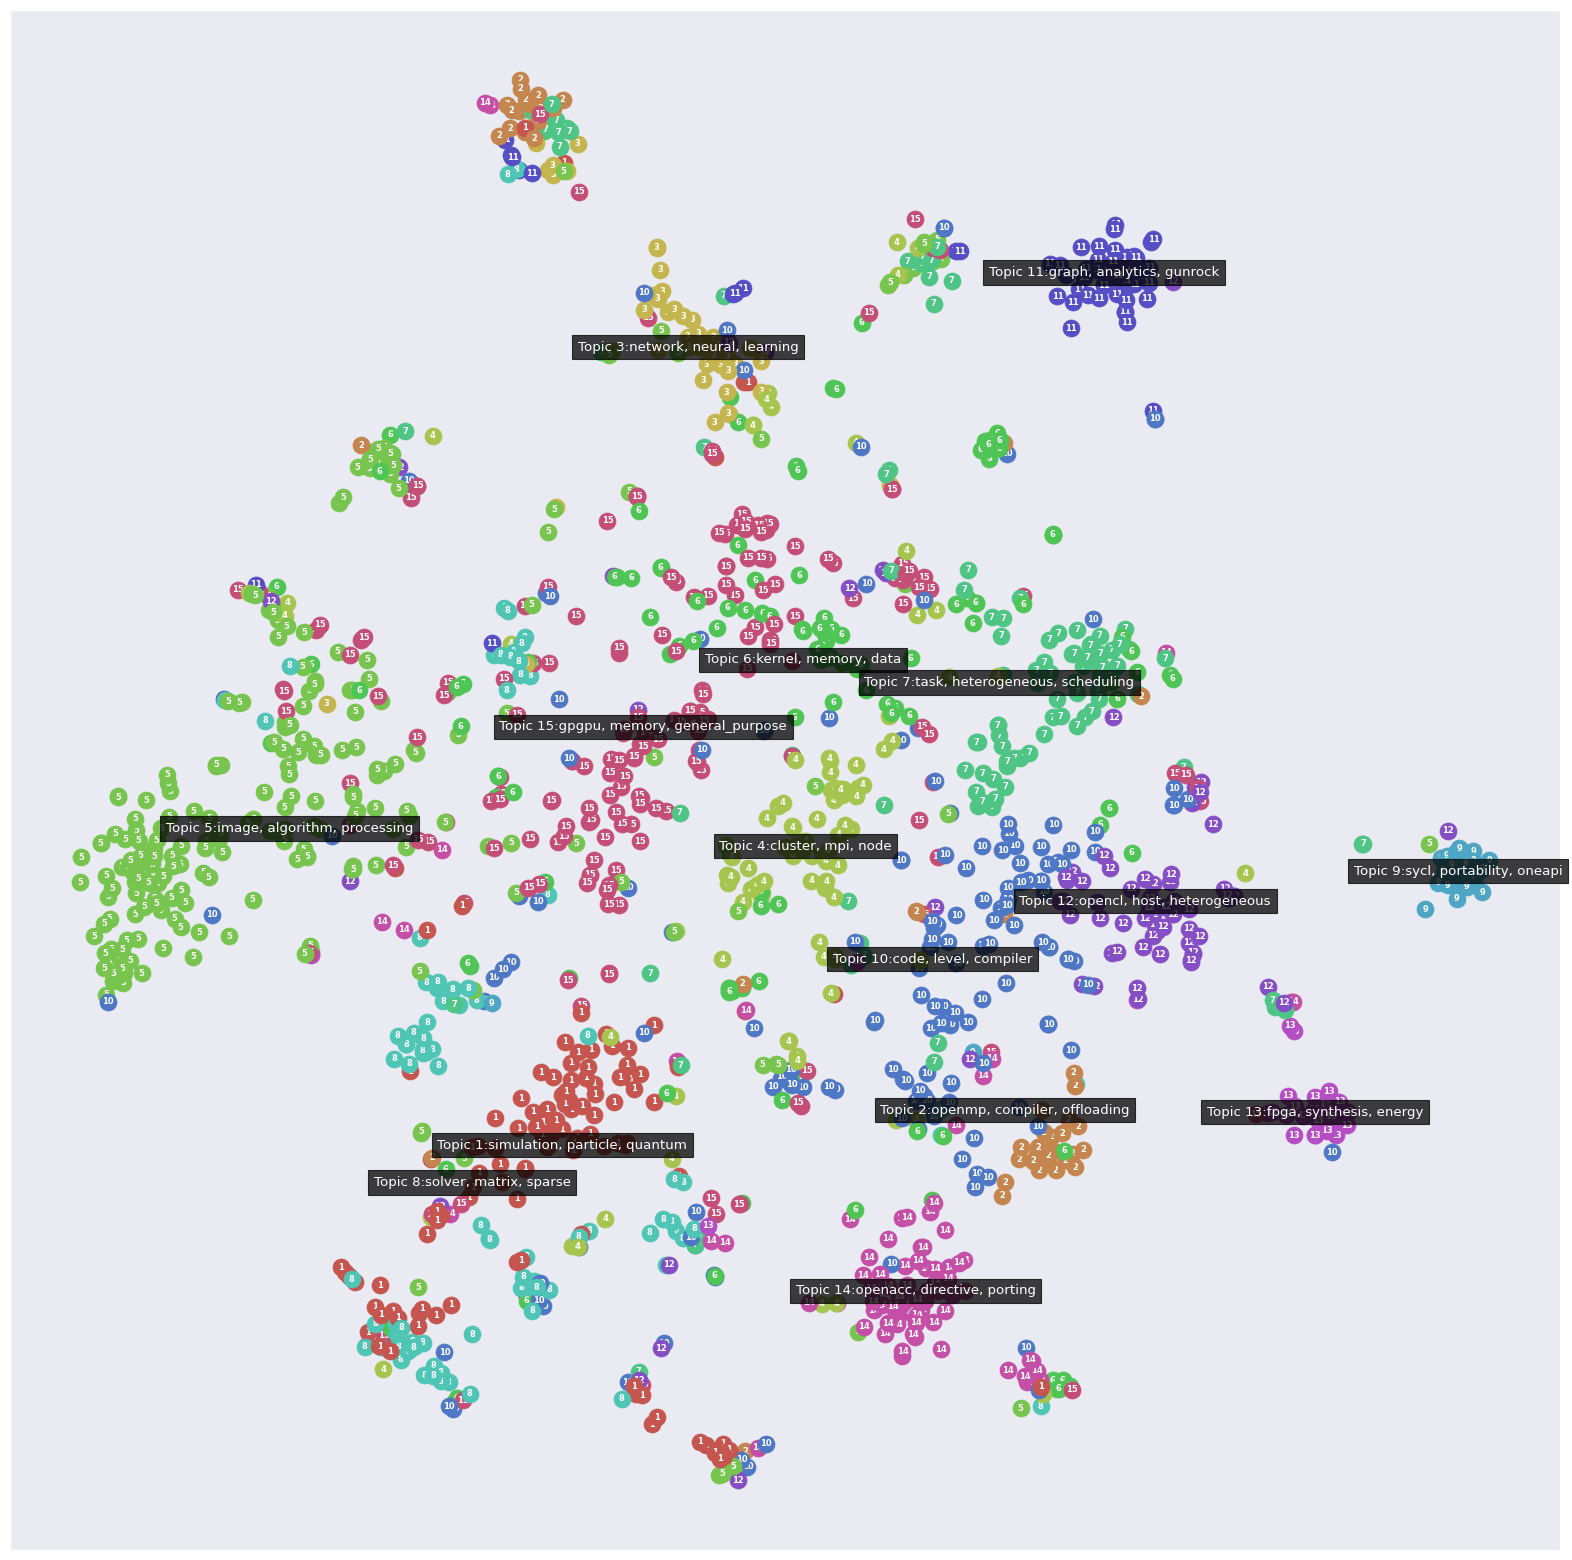

In [ ]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

## Paso 7: Modelamiento de temas avanzado

Podemos combinar los resultados del modelado de temas con la representación gráfica de estadísticas. Aquí mostramos un ejemplo sencillo.

Uno de los temas parece ser sobre "deep learning" (aprendizaje profundo). Primero, encontramos el identificador del tema para el tema que pertenece de manera más fuerte a "deep learning".

In [ ]:
topic_id = topic_model.best_topic_for_token('algorithm')

Imprimimos los 10 principales documentos que pertenecen más fuertemente a este tema para revisar los resultados. Observamos que, de hecho, estos son documentos sobre el tema de aprendizaje profundo.

In [ ]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs[int(doc_id)].title)


Image reconstruction in speckle interferometry
Off-axis quantitative phase imaging processing using CUDA: Toward real-time applications
Image registration techniques using parallel computing in multicore environment and its applications in medical imaging: An overview
Accelerating of color moments and texture features extraction using GPU based parallel computing
Massively parallel image index for vocabulary tree based image retrieval
Accelerating image retrieval using factorial correspondence analysis on GPU
Parallel catmull-rom spline interpolation algorithm for image zooming based on CUDA
Image processing on GPU: Application of integral image
Implementation of Image Enhancement Algorithms and Recursive Ray Tracing using CUDA
Accelerating finite-element-based 3D optical imaging reconstruction by graphic processing units


A continuación, anotamos el conjunto de documentos con una etiqueta "algorithm_topic" para aquellos documentos que pertenecen fuertemente a este tema (es decir, con un peso por encima de cierto umbral).

Después de esto, definimos dos grupos: documentos que tienen la etiqueta "dl_topic" y documentos que no tienen esta etiqueta. Ahora podemos, por ejemplo, imprimir las publicaciones a lo largo de los años para ver si el interés en el aprendizaje profundo ha aumentado o disminuido con el tiempo.

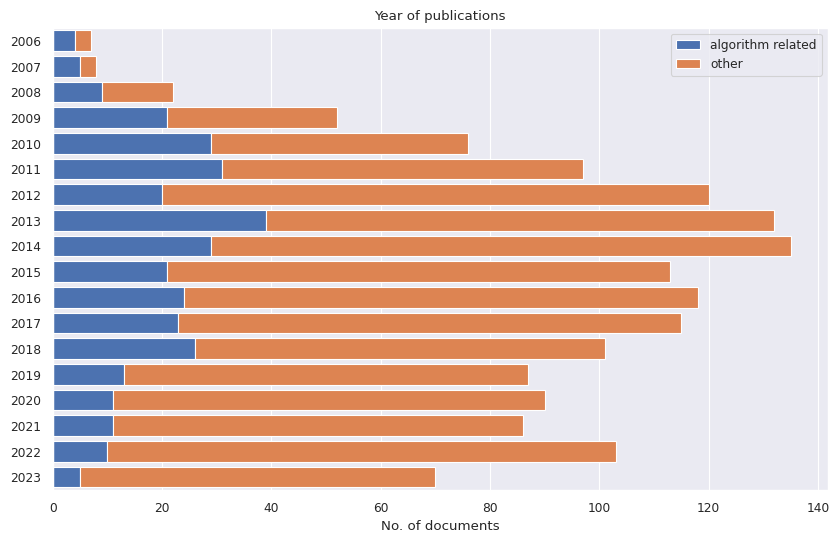

In [ ]:
threshold = 0.2
dl_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = docs.add_property('algorithm_topic', dl_topic)


groups = {
    'algorithm related': 'algorithm_topic',
    'other': 'not algorithm_topic',
}

litstudy.plot_year_histogram(docs, groups=groups, stacked=True);

El histograma muestra que el interés en el tema "algorithm" ha aumentado a lo largo de los años. Incluso podemos calcular la cantidad exacta al calcular el porcentaje de documentos sobre aprendizaje profundo cada año.

In [ ]:
table = litstudy.compute_year_histogram(docs, groups=groups)
table.div(table.sum(axis=1), axis=0) * 100

,algorithm related,other
2006,57.142857,42.857143
2007,62.500000,37.500000
2008,40.909091,59.090909
2009,40.384615,59.615385
2010,38.157895,61.842105
2011,31.958763,68.041237
2012,16.666667,83.333333
2013,29.545455,70.454545
2014,21.481481,78.518519
2015,18.584071,81.415929


Alternativamente, podemos representar gráficamente los dos grupos para la fuente de las publicaciones. Podemos observar que algunos periódicos o conferencias tienen un enfoque sólido en algorithms (por ejemplo, "Neural Computing and Applications"), mientras que otros no tienen o tienen pocas publicaciones sobre aprendizaje profundo (por ejemplo, "Journal of Real Time Image Processing").

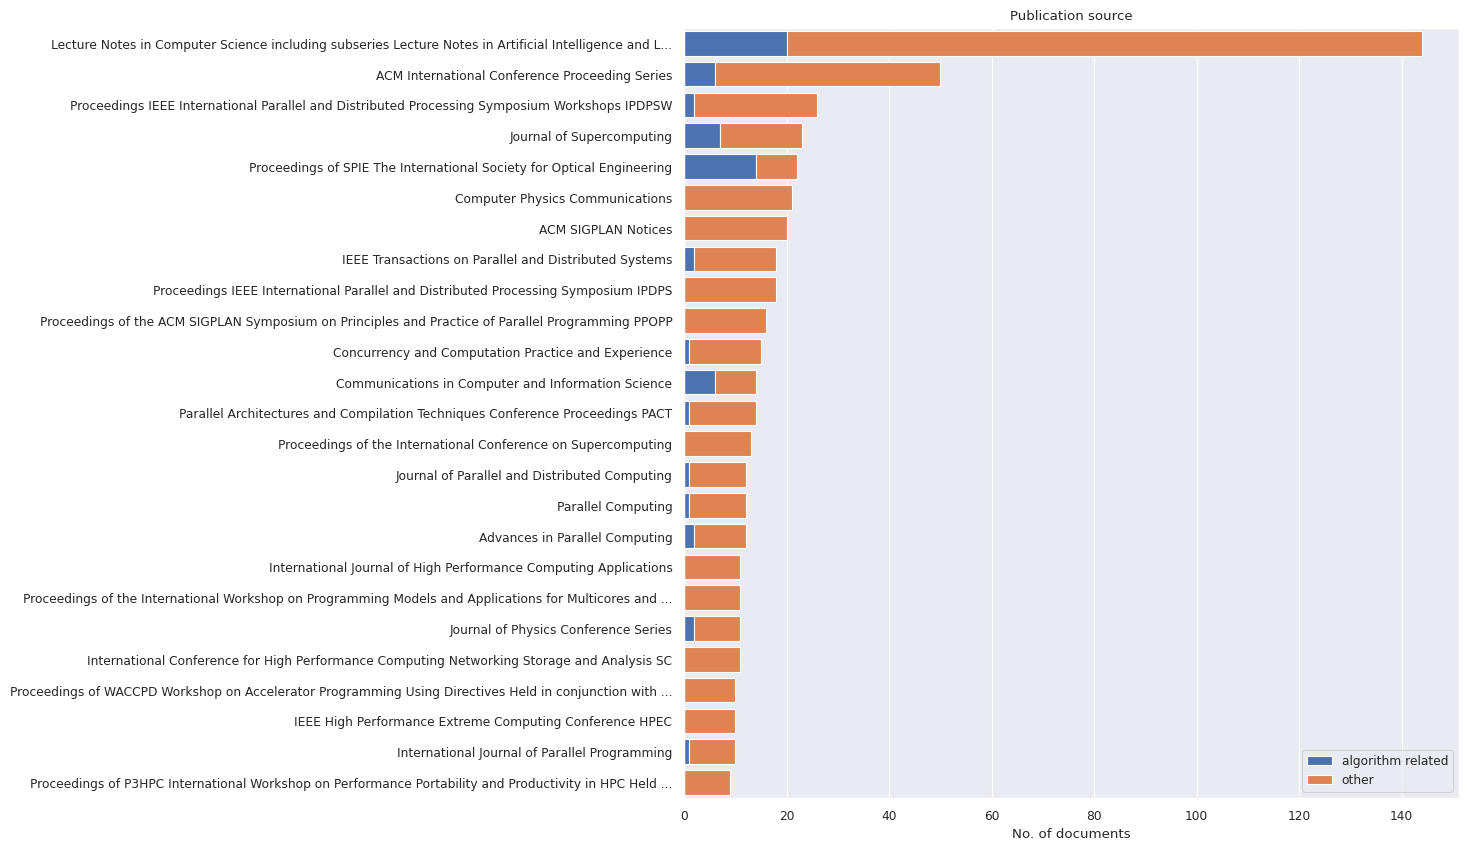

In [ ]:
plt.figure(figsize=(10, 10))
litstudy.plot_source_histogram(docs, groups=groups, limit=25, stacked=True);

In [ ]:
# Compute histogram by publication venue
table = litstudy.compute_source_histogram(docs, groups=groups)

# Add column 'total'
table['total'] = table['algorithm related'] + table['other']

# Remove rare venues that have less than 5 publications
table = table[table['total'] >= 5]

# Add column 'ratio'
table['ratio'] = table['algorithm related'] / table['total'] * 100

# Sort by ratio in descending order
table.sort_values(by='ratio', ascending=False)

,algorithm related,other,total,ratio
Proceedings of SPIE The International Society for Optical Engineering,14,8,22,63.636364
Advances in Intelligent Systems and Computing,5,3,8,62.500000
Procedia Computer Science,4,4,8,50.000000
Progress in Biomedical Optics and Imaging Proceedings of SPIE,3,3,6,50.000000
Communications in Computer and Information Science,6,8,14,42.857143
Lecture Notes in Electrical Engineering,3,4,7,42.857143
Future Generation Computer Systems,2,3,5,40.000000
Journal of Supercomputing,7,16,23,30.434783
IEEE Access,2,5,7,28.571429
Proceedings of the International Conference on Parallel and Distributed Systems ICPADS,2,6,8,25.000000
